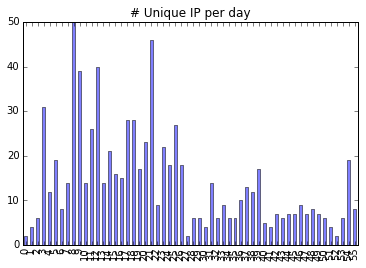

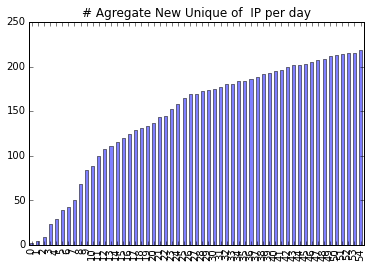

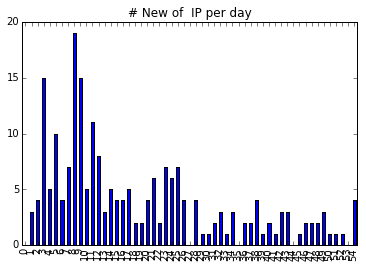

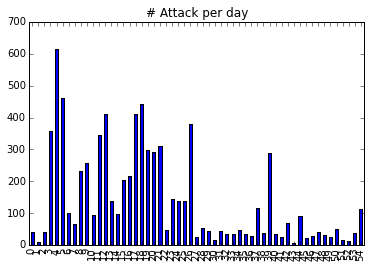

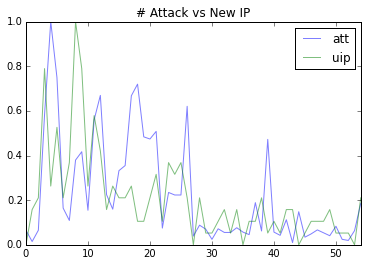

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data =  pd.read_csv('log.csv')
#print list(data.columns.values)
ss = data[['@timestamp','real_region_name','ip']].sort('@timestamp')
from dateutil import parser
date = parser.parse('2015-03-16T07:36:50.935Z')
ip_list = dict()
ip = 0
ip_list[date] = list() 
unique_ip = dict()
uip_set = set()
att_day = dict()
att_c = 0
for x in ss.itertuples():
    if date.day < parser.parse(x[1]).day or date.month < parser.parse(x[1]).month: #cambio de día
        #print date
        unique_ip[(date)] = len(uip_set)
        att_day[parser.parse("%s-%s"%(date.month,date.day))] = att_c
        att_c = 0
        #print len(uip_set)
        date = parser.parse(x[1])
        ip_list[(date)] = list()
    else:
        att_c = att_c + 1
        if x[3] != ip: #cambio de ip
            if ip != 0:
                ip_list[date].append(ip)
                uip_set.add(ip)
            ip = x[3]
#            print x[3]
attd_lc = [(k, v) for k,v in att_day.iteritems()]            
ip_lc = [(k, len(v)) for k,v in ip_list.iteritems()]            
uip_lc = [(k, v) for k,v in unique_ip.iteritems()] # Acumulado 
uip_lc = sorted(uip_lc)
uip_lc_delta = list()
for i in range(len(uip_lc)):
    if i != 0:
        delta = uip_lc[i][1] - uip_lc[i-1][1]
        uip_lc_delta.append((uip_lc[i][0],delta))
    else:
        uip_lc_delta.append((uip_lc[i][0], 0))
             
df = pd.DataFrame(sorted(ip_lc))
df.plot(kind='bar', legend=False, title='# Unique IP per day', alpha=0.5,)
df1 = pd.DataFrame(sorted(uip_lc))
df1.plot(kind='bar', legend=False, title='# Agregate New Unique of  IP per day', alpha=0.5,)
df2 = pd.DataFrame(sorted(uip_lc_delta))
df2.plot(kind='bar', legend=False, title='# New of  IP per day')
df3 = pd.DataFrame(sorted(attd_lc))
df3.plot(kind='bar', legend=False, title='# Attack per day')
att_uipd = [((x[1]+0.0)/(614+0.0), (y[1]+0.0)/(19+0.0)) for x,y in zip(sorted(attd_lc),sorted(uip_lc_delta))]
df4 = pd.DataFrame(att_uipd)
df4.columns = ['att','uip']
df4.plot( legend=True, title='# Attack vs New IP',alpha=0.5)
plt.show()
#print df4.corr

#print df2
    
#data[['@timestamp']] = parser.parse(data[['@timestamp']])
# Growth in attacks  vs Growth botnet
# IP -- Num of requests
# OS, Browser, Request type, User_agent

0.504283832801
0.632556583629


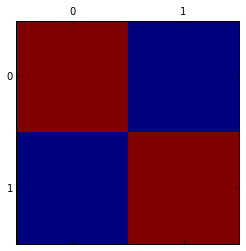

In [7]:
# Growth in attacks  vs Growth botnet
# df4.max()
import scipy.stats
plt.matshow(df4.corr())
print df4['att'].corr(df4['uip'])
print df4['att'].corr(df4['uip'], method='spearman')
# IP -- Num of requests
# OS, Browser, Request type, User_agent



In [131]:
list(sorted(attd_lc))[:][1]

(datetime.datetime(2015, 3, 17, 0, 0), 9)